In [32]:
import pandas as pd
data = pd.read_csv('inputedTrainLimited.csv')
data.tail()

,price_doc,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,kremlin_km
30467,7400000,2015-06-30,44.0,27.0,7,9,1,1975,2,6,3,Investment,Otradnoe,12.599292
30468,25000000,2015-06-30,86.0,59.0,3,9,2,1935,4,10,3,Investment,Tverskoe,3.269284
30469,6970959,2015-06-30,45.0,39.0,10,20,1,2014,1,10,1,OwnerOccupier,Poselenie Vnukovskoe,21.905792
30470,13500000,2015-06-30,64.0,32.0,5,15,1,2003,2,11,2,Investment,Obruchevskoe,13.622569
30471,5600000,2015-06-30,43.0,28.0,1,9,1,1968,2,6,2,Investment,Novogireevo,11.812614


In [108]:
import numpy as np
price = np.array(data['price_doc'])
build_year = np.array(data['build_year'])
full_sq = np.array(data['full_sq'])
x = np.dstack([price, build_year,full_sq])
#this is done because of how dstack works, it gives us a usable array
x = x[0]
x

array([[  5.85000000e+06,   2.01500000e+03,   4.30000000e+01],
       [  6.00000000e+06,   2.01400000e+03,   3.40000000e+01],
       [  5.70000000e+06,   2.01400000e+03,   4.30000000e+01],
       ..., 
       [  6.97095900e+06,   2.01400000e+03,   4.50000000e+01],
       [  1.35000000e+07,   2.00300000e+03,   6.40000000e+01],
       [  5.60000000e+06,   1.96800000e+03,   4.30000000e+01]])

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans()

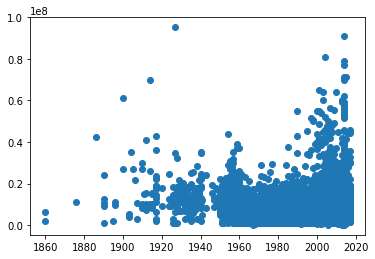

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [109]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
X_normalized = sklearn.preprocessing.normalize(x, norm='l2')
plt.scatter(build_year,price)
plt.show()

kmeans.set_params(n_clusters = 3)
kmeans.fit(X_normalized)



In [71]:
build_year

array([2015, 2014, 2014, ..., 2014, 2003, 1968], dtype=int64)

In [110]:
kmeans.cluster_centers_

array([[  9.99999712e-01,   7.32756642e-04,   1.60893065e-05],
       [  9.99999952e-01,   2.94089976e-04,   7.60614716e-06],
       [  9.99997596e-01,   2.04771341e-03,   4.87143862e-05]])

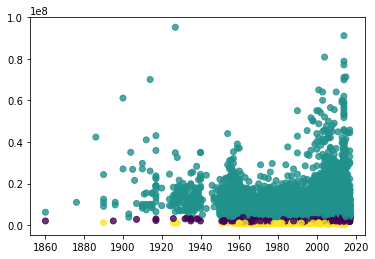

In [111]:
#plt.scatter(x[:, 0], x[:, 1], c = kmeans.labels_, alpha = 0.8)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
#plt.show()
#kmeans.labels_
plt.scatter(build_year, price, c = kmeans.labels_, alpha = 0.8)
plt.show()